### Running B-V circuit on ion trap hardware
In this tutorial we will define the B-V for a 3 bit hidden string s using pytket, then run it on Quantinuums ion trap hardware.
1. Define B-V for a 3 bit hidden string s in Qiskit.
2. Convert from Qiskit to pytket.
3. Run on Quantinuum ion trap hardware.

**Step 1: We begin with a small circuit that implements the BV algorithm for a 3 bit hidden string s, using Qiskit.**

In [1]:
pip install pytket

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install daal==2021.4.0

  Using cached daal-2021.4.0-py2.py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.whl (189.9 MB)
  Using cached tbb-2021.6.0-py2.py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.whl (1.0 MB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2
ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy==1.21.4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pytket-qiskit

Note: you may need to restart the kernel to use updated packages.


In [5]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
from qiskit.compiler import transpile


### Lets defined a new circuit of your choice with no measurements

s = '011'   # the hidden binary string
n = 3 # number of bits used to represent s


# We need a circuit with n qubits, plus one auxiliary qubit
# We also need n classical bits to write the output to
untranspiled_qc = QuantumCircuit(n+1, n)

# Put auxiliary in the minus state |->
# We leave the other n qubits in just |0>
untranspiled_qc.h(n)
untranspiled_qc.z(n)

# Apply Hadamard gates to each of the n "main" qubits (excluding the auxiliary)
# before querying the oracle
for i in range(n):
    untranspiled_qc.h(i)
    
# Apply barrier
untranspiled_qc.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        untranspiled_qc.i(q)
    else:
        untranspiled_qc.cx(q, n)
        
# Apply barrier
untranspiled_qc.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    untranspiled_qc.h(i)


# Measurement
for i in range(n):
    untranspiled_qc.measure(i, i)


untranspiled_qc = transpile(untranspiled_qc, backend=None)  # No Optimization and no mapping because we have not specified a backend.
print('No Optimization')
print('Depth:', untranspiled_qc.depth())
print('Gate counts:', untranspiled_qc.count_ops())
untranspiled_qc.draw()

No Optimization
Depth: 6
Gate counts: OrderedDict([('h', 7), ('measure', 3), ('barrier', 2), ('cx', 2), ('z', 1), ('id', 1)])


┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼─────────■───░─┤ H ├─╫─┤M├───
     ├───┤      ░   │  ┌───┐  │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼──┤ I ├──┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘ ░       ║  ║  ║ 
c: 3/═════════════════════════════════════╩══╩══╩═
                                          0  1  2

**Step 2: Convert from Qiskit to pytket.**

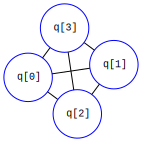

In [8]:
from pytket.extensions.qiskit import qiskit_to_tk
from pytket.utils import Graph

pytket_untranspiled_qc = qiskit_to_tk(untranspiled_qc)
Graph(pytket_untranspiled_qc).save_DAG(name="pytket_B-V_untranspiled", fmt="png") 
#Graph(pytket_untranspiled_qc).get_qubit_graph()

**Step 3: Run pytket circuit on IonQ or Quantinuum ion trap hardware.**

In [7]:
# Quantinuum Backend
"""
from pytket.extensions.quantinuum import QuantinuumBackend

quantinuum_iontrap_backend = QuantinuumBackend("Example")

# Login to your Quantinuum account.
quantinuum_iontrap_backend.login()
"""


# IonQ Backend
from pytket.extensions.ionq import IonQBackend
ionq_iontrap_backend = IonQBackend()

ModuleNotFoundError: No module named 'pytket.extensions.ionq'